11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


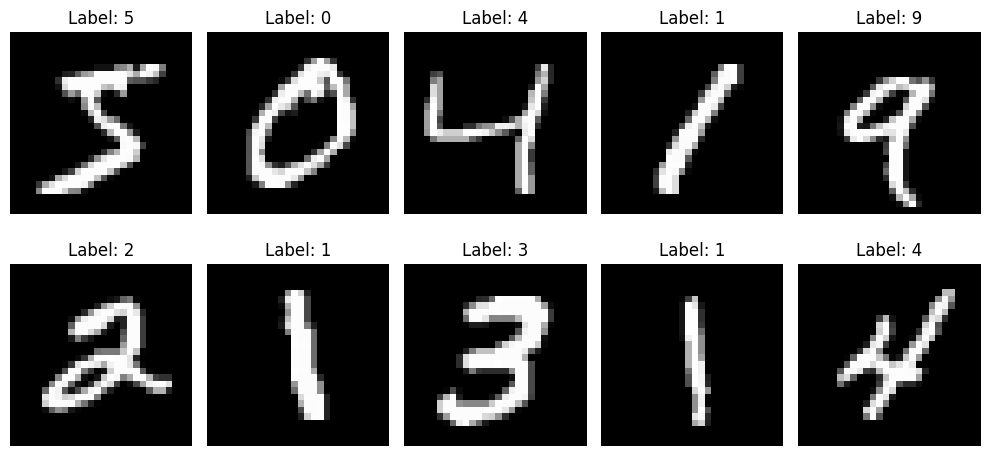

In [1]:
# Import all necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load and explore MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Test data shape:", x_test.shape)       # (10000, 28, 28)
print("Unique labels:", np.unique(y_train))   # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Visualize some samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [2]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)  # (60000, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)    # (10000, 28, 28, 1)

# Convert labels to categorical one-hot encoding
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print("Reshaped training data:", x_train.shape)
print("One-hot labels shape:", y_train_categorical.shape)

Reshaped training data: (60000, 28, 28, 1)
One-hot labels shape: (60000, 10)


In [3]:
# Simple CNN architecture
model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Classification Block
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization to prevent overfitting
    layers.Dense(10, activation='softmax')
])

# Model summary
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Training parameters
epochs = 15
batch_size = 128

# Train the model
history = model.fit(
    x_train, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test_categorical),
    verbose=1
)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 91ms/step - accuracy: 0.7849 - loss: 0.6755 - val_accuracy: 0.9801 - val_loss: 0.0643
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9692 - loss: 0.1055 - val_accuracy: 0.9861 - val_loss: 0.0408
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9786 - loss: 0.0720 - val_accuracy: 0.9875 - val_loss: 0.0355
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9821 - loss: 0.0602 - val_accuracy: 0.9892 - val_loss: 0.0289
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9851 - loss: 0.0490 - val_accuracy: 0.9902 - val_loss: 0.0278
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9870 - loss: 0.0447 - val_accuracy: 0.9911 - val_loss: 0.0255
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9882 - loss: 0.0379 - val_accuracy: 0.9914 - val_loss: 0.0242
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9907 - loss: 0.0315 -


🎯 Final Test Accuracy: 0.9920 (99.20%)


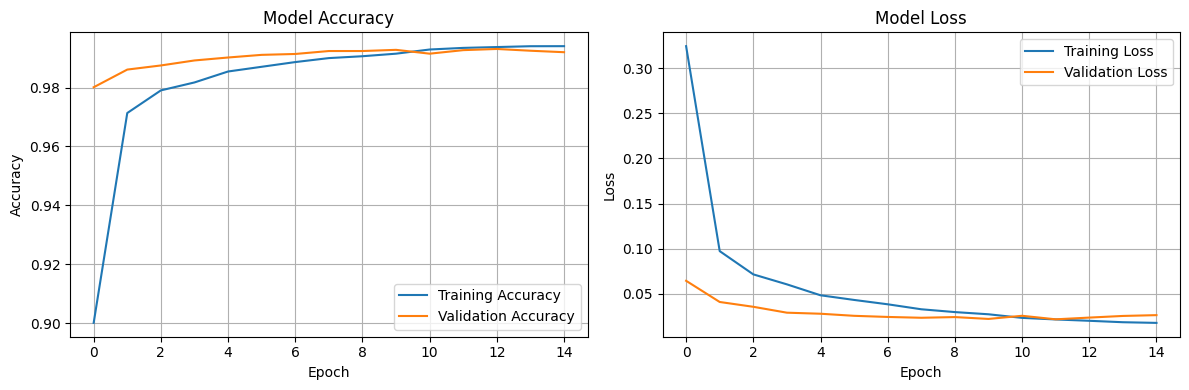

Model saved as 'mnist_cnn_model.h5'


In [5]:
# Final evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f"\n🎯 Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Save the model for bonus task
model.save('mnist_cnn_model.h5')
print("Model saved as 'mnist_cnn_model.h5'")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


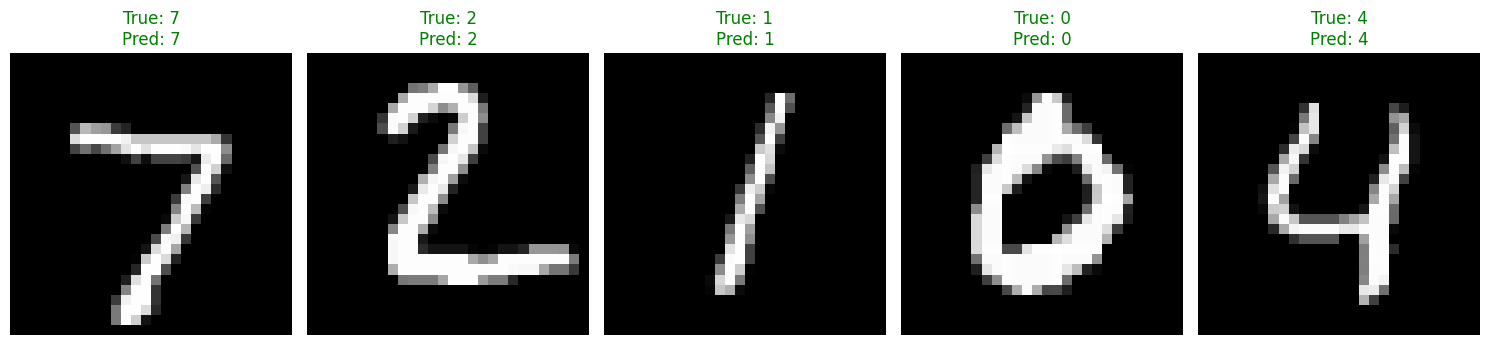

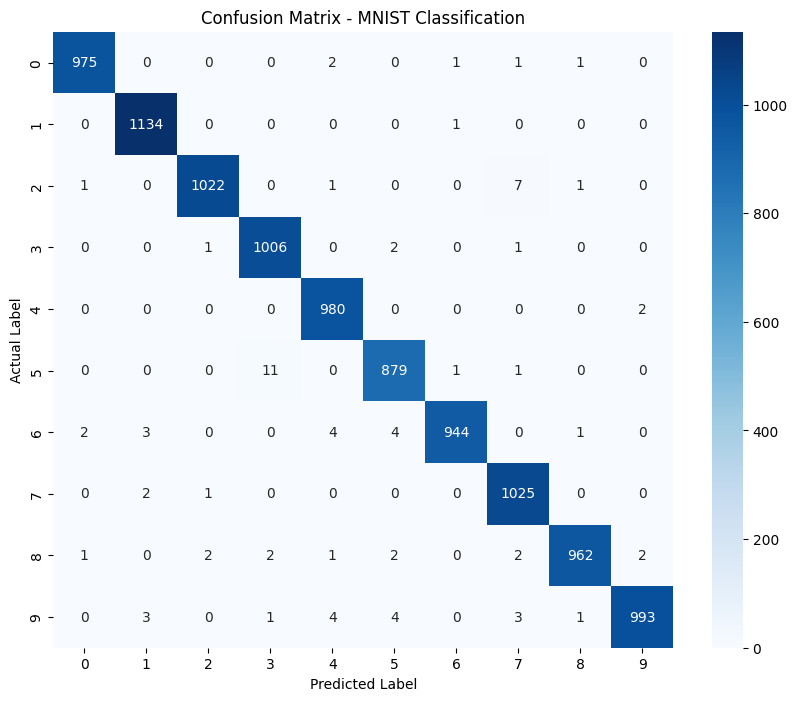

In [6]:
# Make predictions on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Visualize 5 sample predictions
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    # Color code: green if correct, red if wrong
    color = 'green' if y_pred_classes[i] == y_test[i] else 'red'
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_classes[i]}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MNIST Classification')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()